<a href="https://colab.research.google.com/github/Sruthi-Shivaram/Ml_Minor/blob/main/ML_2_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler


In [ ]:
data=pd.read_csv('/horse.csv')

In [ ]:
data.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [ ]:
data.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [ ]:
data.shape

(299, 28)

In [ ]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
data.nunique()

surgery                    2
age                        2
hospital_number          283
rectal_temp               40
pulse                     52
respiratory_rate          40
temp_of_extremities        4
peripheral_pulse           4
mucous_membrane            6
capillary_refill_time      3
pain                       5
peristalsis                4
abdominal_distention       4
nasogastric_tube           3
nasogastric_reflux         3
nasogastric_reflux_ph     20
rectal_exam_feces          4
abdomen                    5
packed_cell_volume        50
total_protein             80
abdomo_appearance          3
abdomo_protein            37
outcome                    3
surgical_lesion            2
lesion_1                  61
lesion_2                   6
lesion_3                   2
cp_data                    2
dtype: int64

In [ ]:
def new_punctuation(df): #This manual ordinal encoder was done looking at the documentation to ensure they follow the correct scale (for ex: more pain -> bigger number)
    df['surgery'] = df['surgery'].map({'yes':1,'no':2,'NaN':0}).astype('float64')    
    
    df['age'] = df['age'].map({'adult':1,'young':2,'NaN':0}).astype('float64')
    df['temp_of_extremities'] = df['temp_of_extremities'].map({'normal':1,'warm':2,'cool':3,'cold':4,'NaN':0}).astype('float64')
    df['surgical_lesion']=df['surgical_lesion'].map({'yes':1,'no':0}).astype('float64')

    df['temp_of_extremities']=df['temp_of_extremities'].replace(np.nan, 0)
    df['peripheral_pulse'] = df['peripheral_pulse'].map({'increased':2,'normal':1,'reduced':3,'absent':4,'NaN':0}).astype('float64')
    df['peripheral_pulse']=df['peripheral_pulse'].replace(np.nan, 0)
    df['mucous_membrane'] = df['mucous_membrane'].map({'dark_cyanotic':6,'bright_red':5,'pale_cyanotic':4,'pale_pink':3,'bright_pink':2,'normal_pink':1,'NaN':0}).astype('float64')
    df['mucous_membrane']=df['mucous_membrane'].replace(np.nan, 0)
    df['capillary_refill_time'] = df['capillary_refill_time'].map({'more_3_sec':3, '3':2, 'less_3_sec':1,'NaN':0}).astype('float64')
    df['capillary_refill_time']=df['capillary_refill_time'].replace(np.nan, 0)
    df['pain'] = df['pain'].map({'extreme_pain':5, 'severe_pain':4, 'mild_pain':3, 'depressed':2, 'alert':1,'NaN':0}).astype('float64')
    df['pain']=df['pain'].replace(np.nan, 0)
    df['peristalsis'] = df['peristalsis'].map({'absent':4, 'hypomotile':3, 'normal':2, 'hypermotile':1,'NaN':0}).astype('float64')
    df['peristalsis'] = df['peristalsis'].replace(np.nan,0)
    df['abdominal_distention'] = df['abdominal_distention'].map({'severe':4,'moderate':3,'slight':2,'none':1,'NaN':0}).astype('float64')
    df['abdominal_distention']=df['abdominal_distention'].replace(np.nan, 0)
    df['nasogastric_tube'] = df['nasogastric_tube'].map({'significant':3, 'slight':2, 'none':1,'NaN':0}).astype('float64')
    df['nasogastric_tube']=df['nasogastric_tube'].replace(np.nan, 0)
    df['nasogastric_reflux'] = df['nasogastric_reflux'].map({'more_1_liter':3, 'less_1_liter':2, 'none':0,'NaN':0}).astype('float64')
    df['nasogastric_reflux']=df['nasogastric_reflux'].replace(np.nan, 0)
    df['rectal_exam_feces'] = df['rectal_exam_feces'].map({'absent':4, 'decreased':3, 'increased':2, 'normal':1,'NaN':0}).astype('float64')
    df['rectal_exam_feces']=df['rectal_exam_feces'].replace(np.nan, 0)
    df['abdomen'] = df['abdomen'].map({'distend_large':5, 'distend_small':4, 'firm':3, 'other':2, 'normal':1,'NaN':0}).astype('float64')
    df['abdomen']=df['abdomen'].replace(np.nan, 0)
    df['abdomo_appearance'] = df['abdomo_appearance'].map({'serosanguious':3, 'cloudy':2, 'clear':1,'NaN':0}).astype('float64')
    df['abdomo_appearance']=df['abdomo_appearance'].replace(np.nan, 0)
    df['outcome'] = df['outcome'].map({'euthanized':3, 'died':2, 'lived':1}).astype('float64')
    df['rectal_temp']=df['rectal_temp'].replace(np.nan, 37.8)
    df['pulse']=df['pulse'].replace(np.nan, 0)
    df['respiratory_rate']=df['respiratory_rate'].replace(np.nan, 0)
    df['nasogastric_reflux_ph']=df['nasogastric_reflux_ph'].replace(np.nan, 0)
    df['packed_cell_volume']=df['packed_cell_volume'].replace(np.nan, 0)
    df['total_protein']=df['total_protein'].replace(np.nan, 0)
    df['abdomo_protein']=df['abdomo_protein'].replace(np.nan, 0)
    return df

In [ ]:
import numpy as np

new_punctuation(data)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,2.0,1.0,530101,38.5,66.0,28.0,3.0,3.0,0.0,3.0,...,45.0,8.4,0.0,0.0,2.0,0.0,11300,0,0,no
1,1.0,1.0,534817,39.2,88.0,20.0,0.0,0.0,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,0.0,2208,0,0,no
2,2.0,1.0,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,0.0,0.0,1.0,0.0,0,0,0,yes
3,1.0,2.0,5290409,39.1,164.0,84.0,4.0,1.0,6.0,3.0,...,48.0,7.2,3.0,5.3,2.0,1.0,2208,0,0,yes
4,2.0,1.0,530255,37.3,104.0,35.0,0.0,0.0,6.0,3.0,...,74.0,7.4,0.0,0.0,2.0,0.0,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,533886,37.8,120.0,70.0,4.0,0.0,4.0,3.0,...,55.0,65.0,0.0,0.0,3.0,0.0,3205,0,0,no
295,2.0,1.0,527702,37.2,72.0,24.0,3.0,2.0,4.0,3.0,...,44.0,0.0,3.0,3.3,3.0,1.0,2208,0,0,yes
296,1.0,1.0,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,0.0,0.0,2.0,1.0,3205,0,0,no
297,1.0,1.0,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1.0,2208,0,0,yes


In [ ]:
data=data.drop(["hospital_number","cp_data"],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    float64
 1   age                    299 non-null    float64
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    float64
 6   peripheral_pulse       299 non-null    float64
 7   mucous_membrane        299 non-null    float64
 8   capillary_refill_time  299 non-null    float64
 9   pain                   299 non-null    float64
 10  peristalsis            299 non-null    float64
 11  abdominal_distention   299 non-null    float64
 12  nasogastric_tube       299 non-null    float64
 13  nasogastric_reflux     299 non-null    float64
 14  nasogastric_reflux_ph  299 non-null    float64
 15  rectal

In [ ]:
data.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [ ]:
data.shape

(299, 26)

In [ ]:
data.columns

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'outcome', 'surgical_lesion',
       'lesion_1', 'lesion_2', 'lesion_3'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

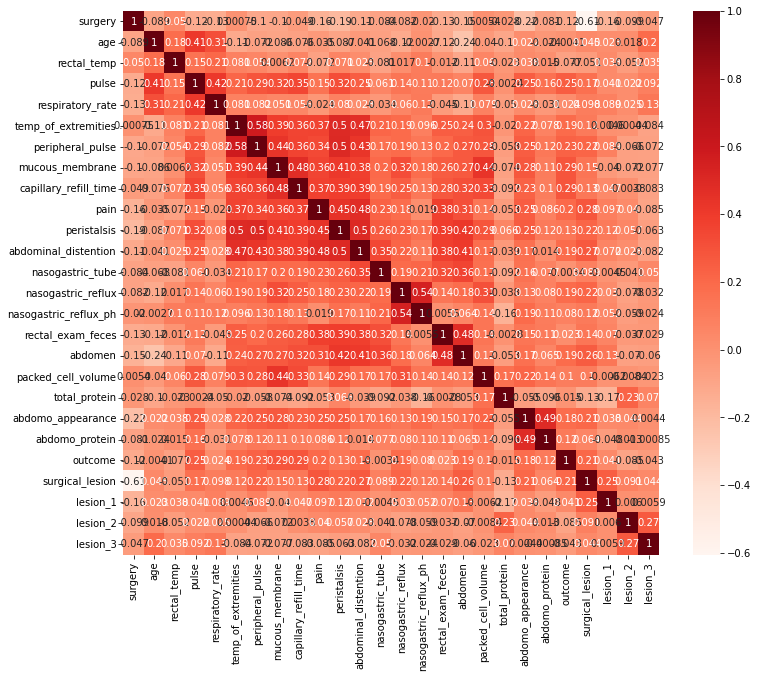

In [ ]:
import matplotlib.pyplot as plt
correlation=data.corr()
correlation
plt.figure(figsize=(12,10))

sns.heatmap(correlation,annot=True,cmap=plt.cm.Reds)
plt.show

In [ ]:
correlation_mat = data.corr()
corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

surgery                surgical_lesion         -0.605023
surgical_lesion        surgery                 -0.605023
peristalsis            peripheral_pulse         0.503807
peripheral_pulse       peristalsis              0.503807
nasogastric_reflux     nasogastric_reflux_ph    0.544872
nasogastric_reflux_ph  nasogastric_reflux       0.544872
temp_of_extremities    peripheral_pulse         0.580724
peripheral_pulse       temp_of_extremities      0.580724
surgery                surgery                  1.000000
lesion_1               lesion_1                 1.000000
age                    age                      1.000000
rectal_temp            rectal_temp              1.000000
pulse                  pulse                    1.000000
respiratory_rate       respiratory_rate         1.000000
temp_of_extremities    temp_of_extremities      1.000000
peripheral_pulse       peripheral_pulse         1.000000
mucous_membrane        mucous_membrane          1.000000
capillary_refill_time  capillar

In [ ]:
dataf=((data-data.min())/(data.max()-data.min()))*20

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


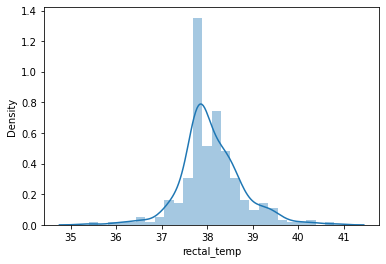

In [ ]:
sns.distplot(data['rectal_temp'])

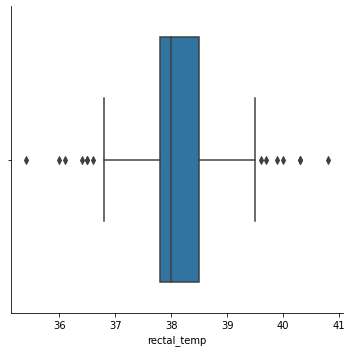

In [ ]:
sns.catplot(x='rectal_temp',kind='box',data=data)

In [ ]:
for x in ['rectal_temp']:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    data.loc[data[x] < min,x] = 37.5
    data.loc[data[x] > max,x] = 38.5

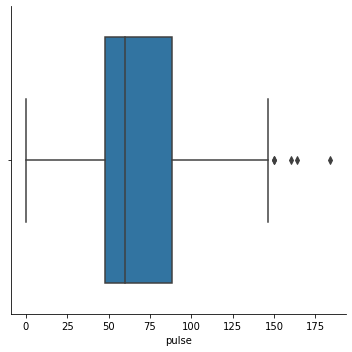

In [ ]:
sns.catplot(x='pulse',kind='box',data=data)

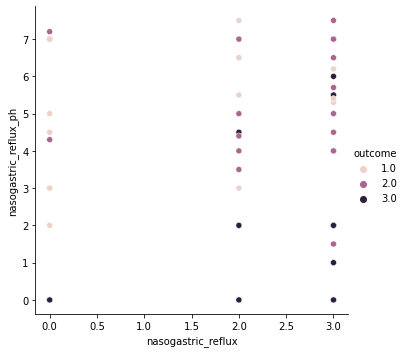

In [ ]:
sns.relplot(x='nasogastric_reflux',y='nasogastric_reflux_ph',hue='outcome',data=data)

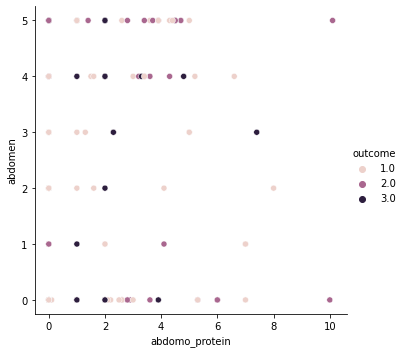

In [ ]:
sns.relplot(x='abdomo_protein',y='abdomen',hue='outcome',data=data)

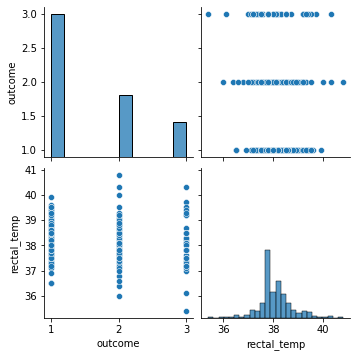

In [ ]:
sns.pairplot(data[['outcome','rectal_temp']])

<BarContainer object of 299 artists>

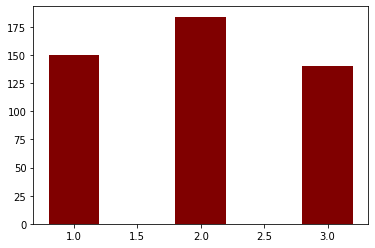

In [ ]:
plt.bar(data['outcome'], data['pulse'], color ='maroon',
        width = 0.4)

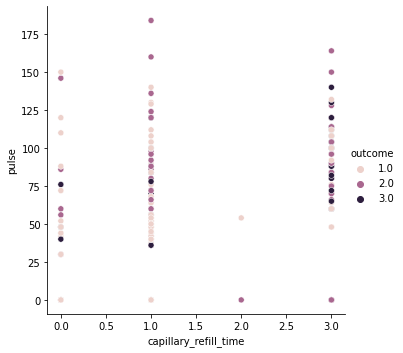

In [ ]:
sns.relplot(x='capillary_refill_time',y='pulse',hue='outcome',data=data)

In [ ]:

Selected_features = ['surgery', 'age', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_ph',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein','surgical_lesion',
       'abdomo_appearance', 'abdomo_protein',
       'lesion_1', 'lesion_2', 'lesion_3']
X = data[Selected_features]
y = data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

print('Score: {:.2f}'.format(classifier.score(X_test,y_test))) 

[[35  4  2]
 [ 9  8  1]
 [14  1  1]]
Score: 0.59


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Results:
1. With normal dropping of null values- 0.33
2. With replacing with 0 -0.55
3. Dropping few columns and cleaning outliers-0.59